In [1]:
graph = {
    '5':['3','7'],
    '3':['2','4'],
    '7':['8'],
    '2':[],
    '4':['8'],
    '8':[],
}

In [2]:
visited = [] # List for visited nodes.
queue = [] #Initialize a queue
def bfs(visited, graph, node): #function for BFS
    visited.append(node)
    queue.append(node)
    while queue: # Creating loop to visit each node
        m = queue.pop(0)
        print (m, end = " ")
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

In [3]:
# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5') # function calling

Following is the Breadth-First Search
5 3 7 2 4 8 

In [4]:
import networkx as nx
from collections import deque
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs(graph, start):
    visited = []  # List for visited nodes
    queue = deque([(start, None)])  # Initialize a queue with (node, parent)
    path = []  # Track the path

    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while queue:  # Loop to visit each node
        current_node, parent_node = queue.popleft()
        if current_node not in visited:
            visited.append(current_node)
            path.append(current_node)
            visit_count += 1  # Increment the visit count

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node if parent_node else '-',
                'QUEUE': ' '.join([n for n, _ in queue]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            for neighbour in graph[current_node]:
                if neighbour not in visited and neighbour not in [n for n, _ in queue]:  # Ensure not revisiting
                    queue.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nBFS Traversal Steps:")
    print(df.to_markdown(index=False))

# Driver Code
print("Following is the Breadth-First Search")
bfs(graph, '5')  # Function calling

Following is the Breadth-First Search

Path: 5 -> 3 -> 7 -> 2 -> 4 -> 8

BFS Traversal Steps:
|   Current Node | Parent Node   | QUEUE   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---------------:|:--------------|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|              5 | -             |         | 5                 |   1 | -   | -   | -   | -   | -   |
|              3 | 5             | 7       | 5 3               |   2 | 2   | -   | -   | -   | -   |
|              7 | 5             | 2 4     | 5 3 7             |   3 | 3   | 3   | -   | -   | -   |
|              2 | 3             | 4 8     | 5 3 7 2           |   4 | 4   | 4   | 4   | -   | -   |
|              4 | 3             | 8       | 5 3 7 2 4         |   5 | 5   | 5   | 5   | 5   | -   |
|              8 | 7             |         | 5 3 7 2 4 8       |   6 | 6   | 6   | 6   | 6   | 6   |


In [8]:
import numpy as np
from collections import deque
import pandas as pd

# Define the goal state
goal_state = ((1, 2, 3), 
              (4, 5, 6), 
              (7, 8, 0))

# Possible moves: Up, Down, Left, Right
moves = {
    'Up': (-1, 0),
    'Down': (1, 0),
    'Left': (0, -1),
    'Right': (0, 1)
}

# Function to check if the current state is the goal state
def is_goal(state):
    return state == goal_state

# Function to get the blank (zero) position
def get_blank_position(state):
    for i, row in enumerate(state):
        for j, value in enumerate(row):
            if value == 0:
                return i, j

# Function to generate a new state after a move
def generate_new_state(state, move):
    i, j = get_blank_position(state)
    new_i, new_j = i + move[0], j + move[1]

    if 0 <= new_i < 3 and 0 <= new_j < 3:
        new_state = list(list(row) for row in state)
        new_state[i][j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[i][j]
        return tuple(tuple(row) for row in new_state)
    return None

def bfs(initial_state):
    visited = set()  # Set for visited nodes
    queue = deque([(initial_state, None, None)])  # Initialize a queue with (node, parent, move)
    path = []  # Track the path

    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []

    while queue:  # Loop to visit each node
        current_state, parent_state, move = queue.popleft()
        if current_state not in visited:
            visited.add(current_state)
            path.append((current_state, move))
            visit_count += 1  # Increment the visit count

            # Update the table components
            step_info = {
                'Current State': '\n'.join([' '.join(map(str, row)) for row in current_state]),
                'Parent State': '\n'.join([' '.join(map(str, row)) for row in parent_state]) if parent_state else '-',
                'Move': move if move else '-',
                'QUEUE': ' | '.join(
                    ['\n'.join([' '.join(map(str, row)) for row in state]) for state, _, _ in queue]),
                'Processed States': ' | '.join(
                    ['\n'.join([' '.join(map(str, row)) for row in state]) for state in visited])
            }
            steps.append(step_info)

            if is_goal(current_state):
                break

            for move_name, move in moves.items():
                new_state = generate_new_state(current_state, move)
                if new_state and new_state not in visited and new_state not in [state for state, _, _ in queue]:
                    queue.append((new_state, current_state, move_name))

    # Create the table
    df = pd.DataFrame(steps)
    df = df[['Current State', 'Parent State', 'Move', 'QUEUE', 'Processed States']]
    
    print("\nPath to Solution:")
    for state, move in path:
        print(f"Move: {move}\n{np.array(state)}\n")
        
    print("\nBFS Traversal Steps:")
    print(df.to_markdown(index=False))

# Driver Code
initial_state = ((1, 2, 3),
                 (4, 0, 6),
                 (7, 5, 8))  # Define the initial state of the puzzle

print("Following is the Breadth-First Search for the 8-puzzle problem")
bfs(initial_state)  # Function calling


Following is the Breadth-First Search for the 8-puzzle problem

Path to Solution:
Move: None
[[1 2 3]
 [4 0 6]
 [7 5 8]]

Move: Up
[[1 0 3]
 [4 2 6]
 [7 5 8]]

Move: Down
[[1 2 3]
 [4 5 6]
 [7 0 8]]

Move: Left
[[1 2 3]
 [0 4 6]
 [7 5 8]]

Move: Right
[[1 2 3]
 [4 6 0]
 [7 5 8]]

Move: Left
[[0 1 3]
 [4 2 6]
 [7 5 8]]

Move: Right
[[1 3 0]
 [4 2 6]
 [7 5 8]]

Move: Left
[[1 2 3]
 [4 5 6]
 [0 7 8]]

Move: Right
[[1 2 3]
 [4 5 6]
 [7 8 0]]


BFS Traversal Steps:
| Current State   | Parent State   | Move   | QUEUE         | Processed States   |
|:----------------|:---------------|:-------|:--------------|:-------------------|
| 1 2 3           | -              | -      |               | 1 2 3              |
| 4 0 6           |                |        |               | 4 0 6              |
| 7 5 8           |                |        |               | 7 5 8              |
| 1 0 3           | 1 2 3          | Up     | 1 2 3         | 1 2 3              |
| 4 2 6           | 4 0 6          | 

Following is the Breadth-First Search for the maze problem:


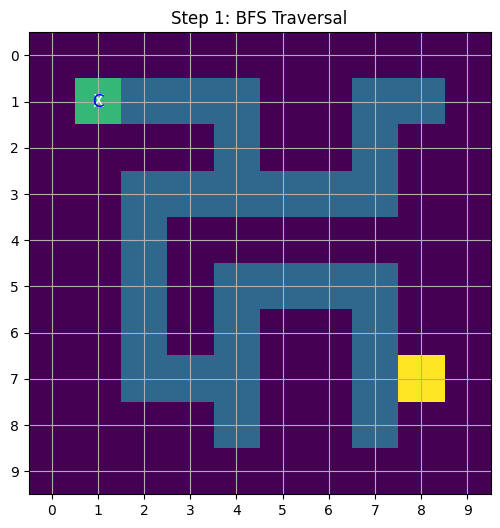

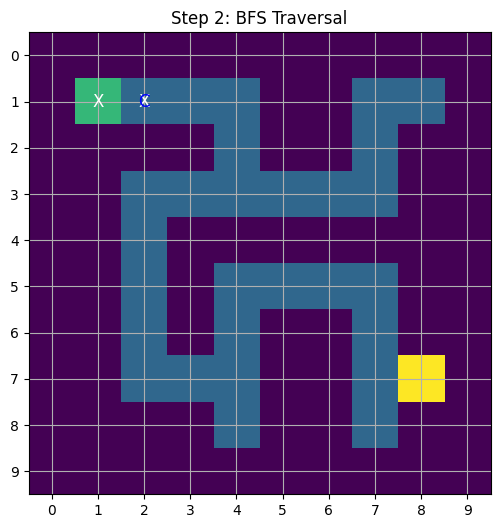

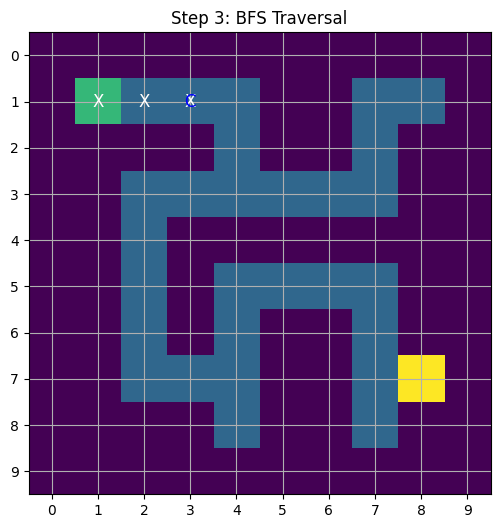

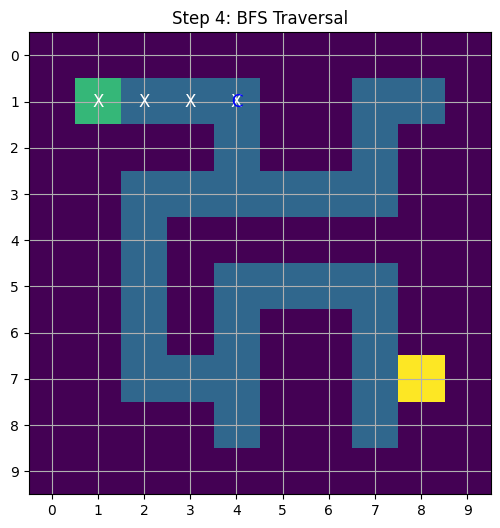

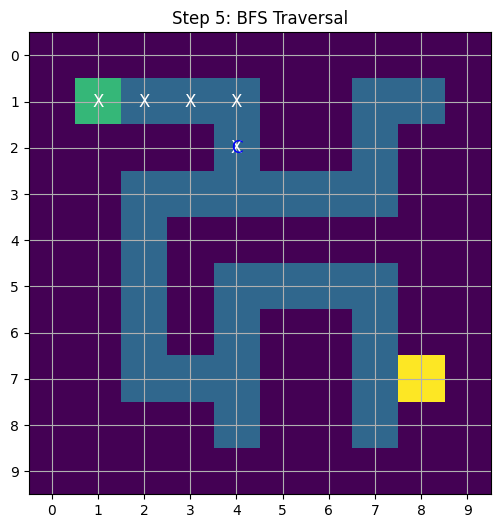

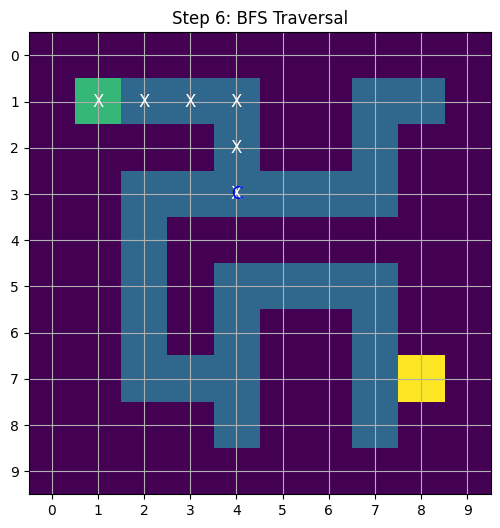

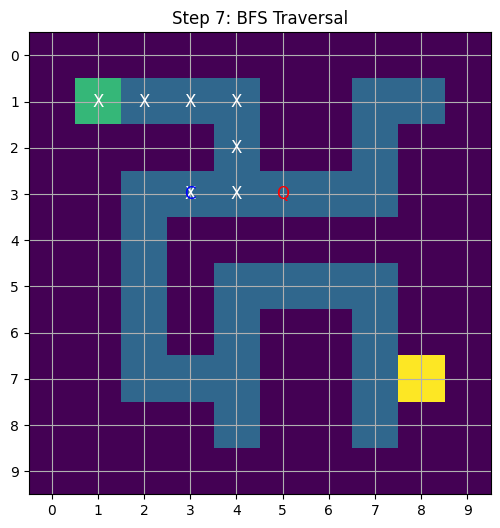

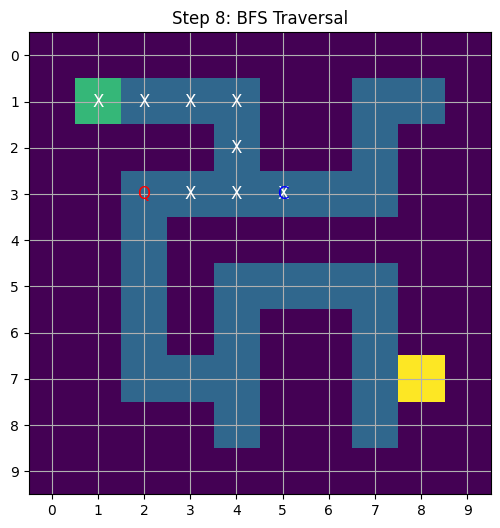

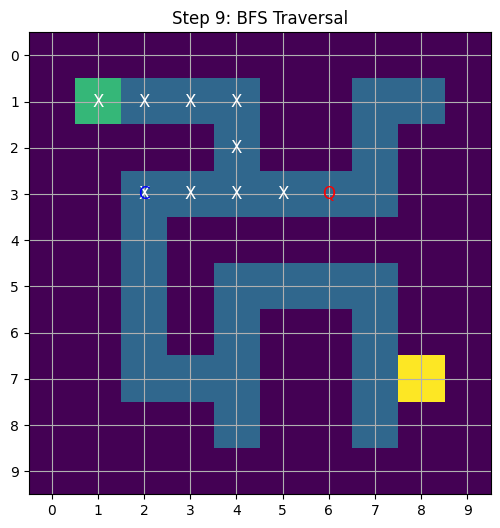

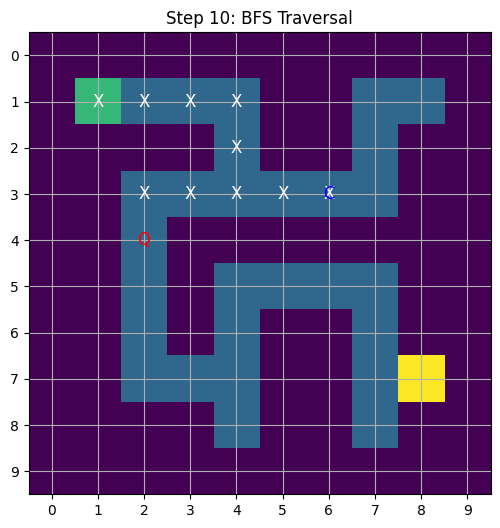

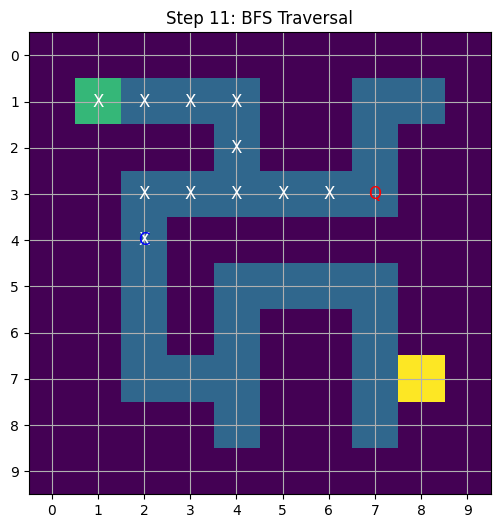

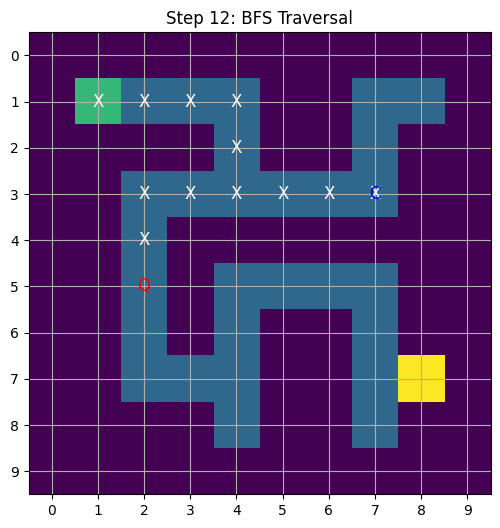

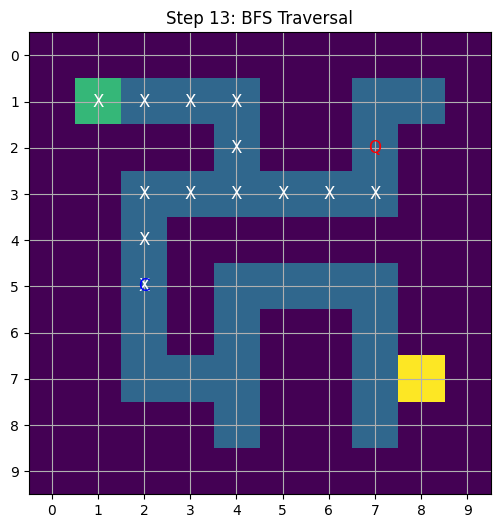

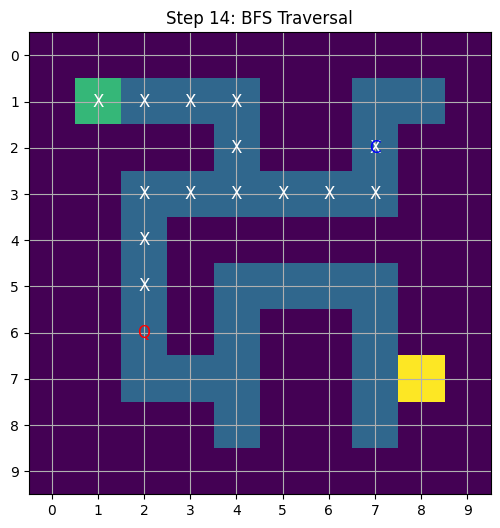

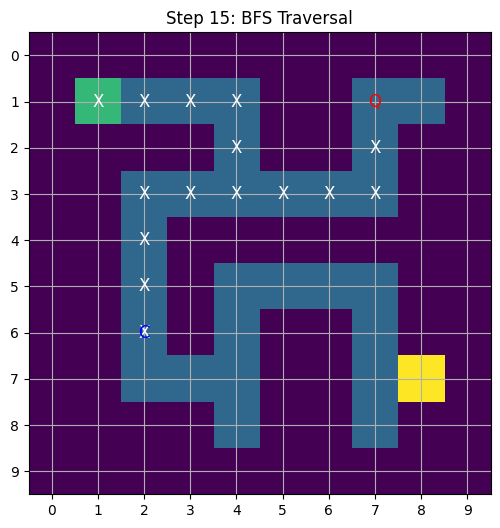

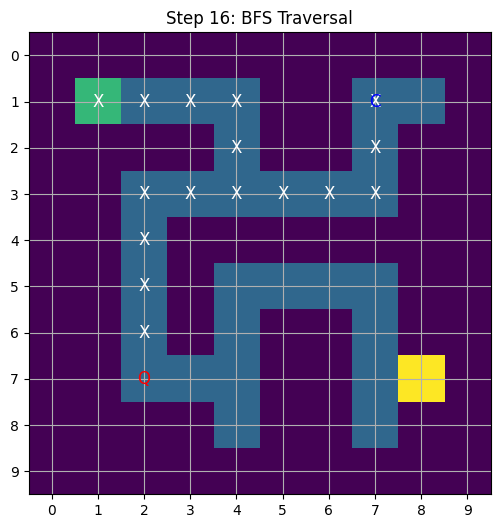

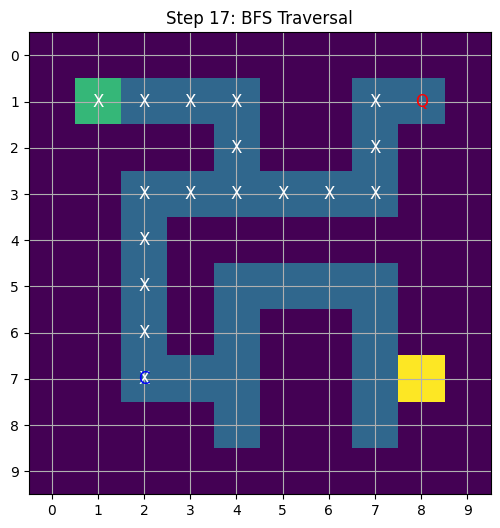

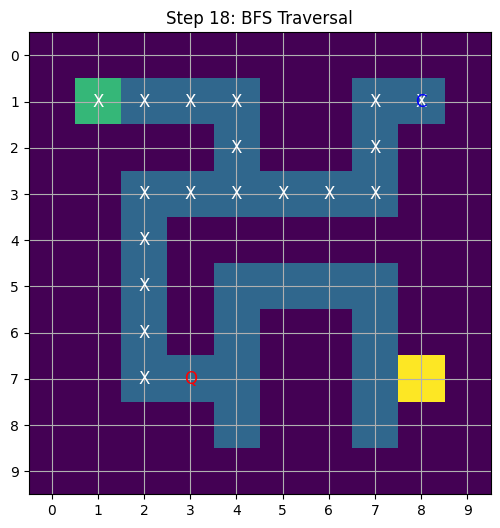

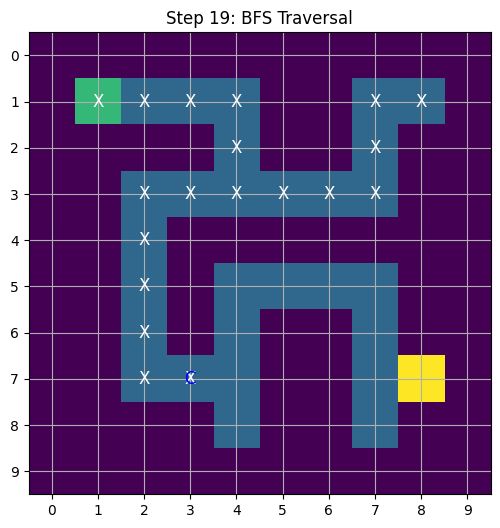

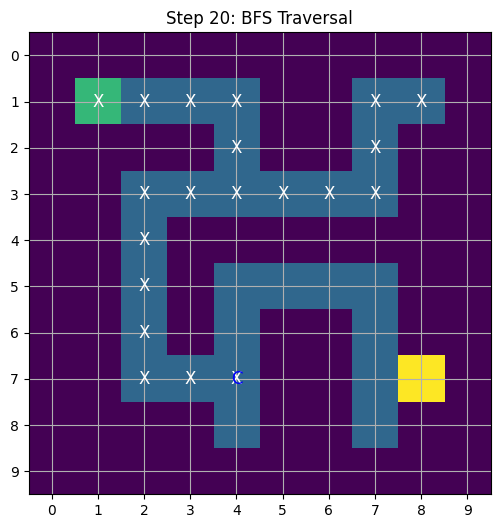

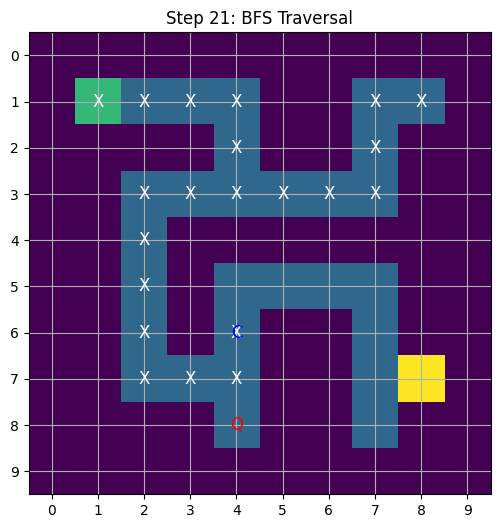

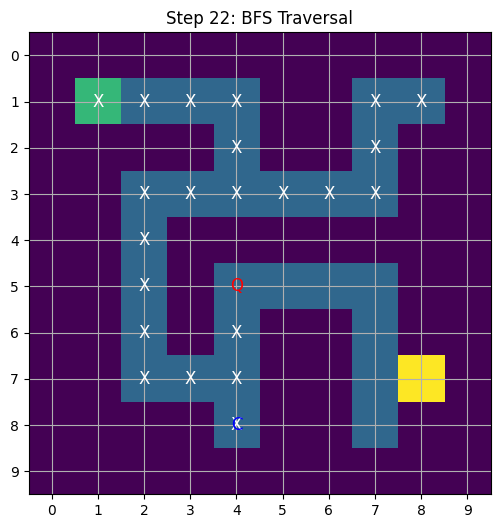

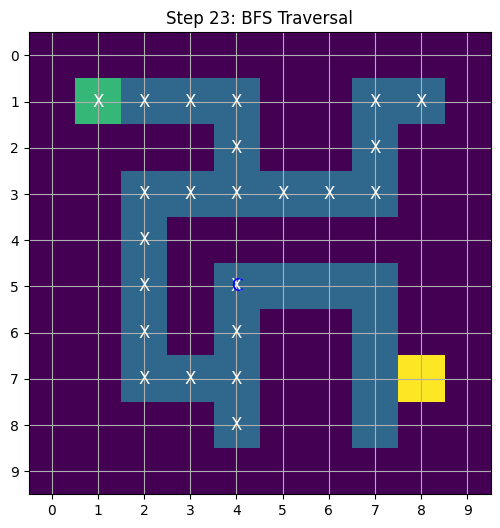

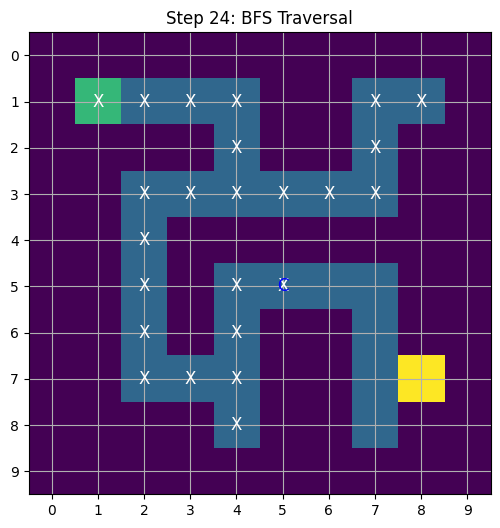

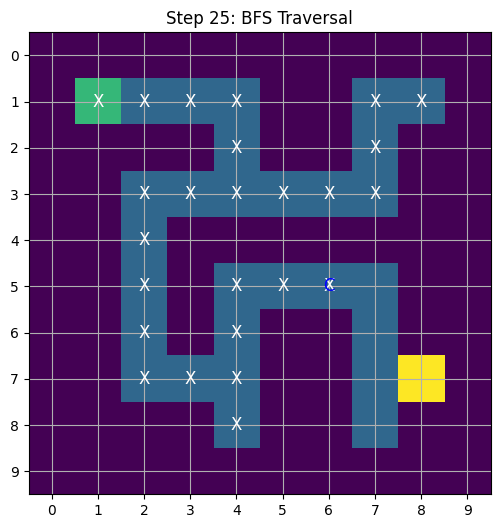

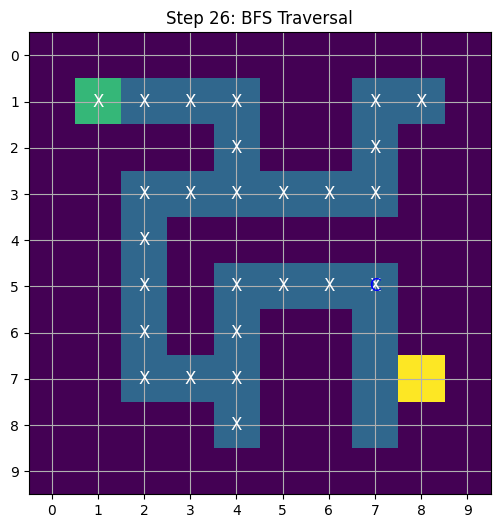

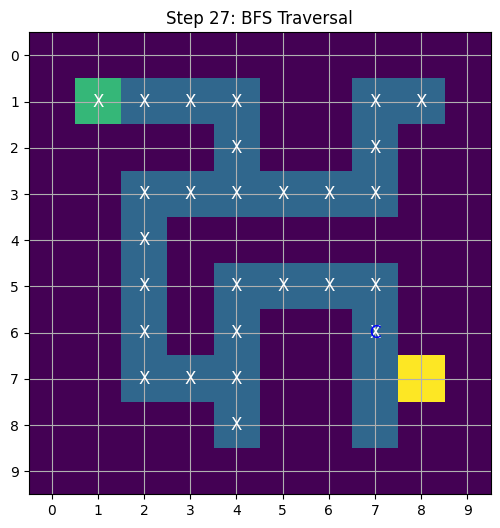

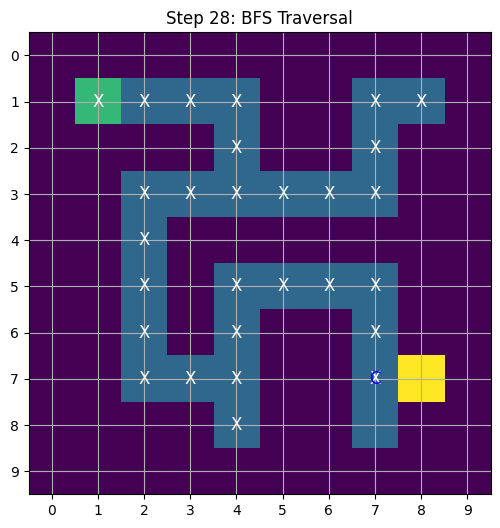

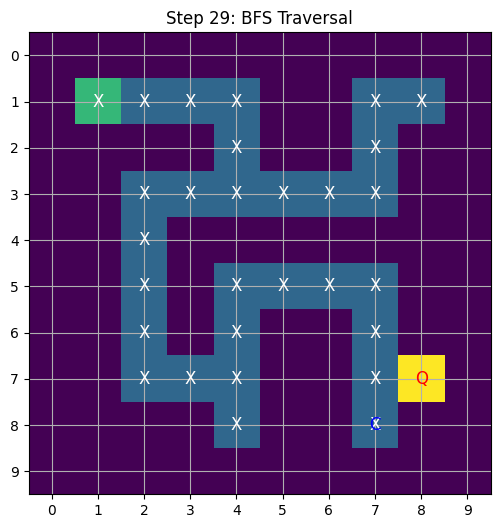

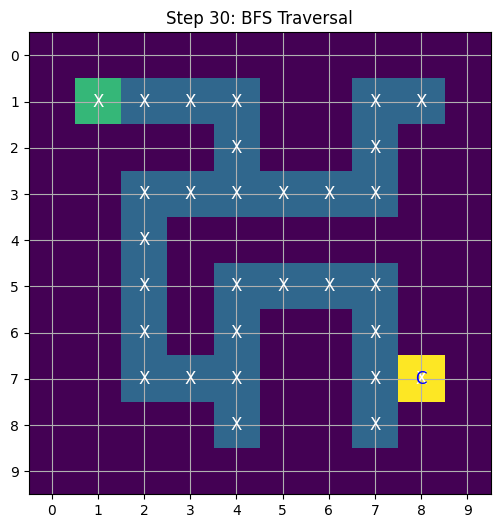

Path from start to goal: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (6, 4), (5, 4), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (7, 8)]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Define the maze grid
starting_grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 3, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

def plot_grid(grid, visited, current, queue, title=""):
    plt.figure(figsize=(6, 6))
    cmap = plt.cm.viridis
    plt.imshow(grid, cmap=cmap)

    for (x, y) in visited:
        plt.text(y, x, 'X', ha='center', va='center', color='white', fontsize=12)

    for (x, y) in queue:
        plt.text(y, x, 'Q', ha='center', va='center', color='red', fontsize=12)

    if current:
        plt.text(current[1], current[0], 'C', ha='center', va='center', color='blue', fontsize=12)

    plt.title(title)
    plt.grid(True)
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.show()

def bfs(grid):
    start = tuple(np.argwhere(grid == 2)[0])  # Find the start position
    goal = tuple(np.argwhere(grid == 3)[0])   # Find the goal position

    visited = set()
    queue = deque([(start, None)])  # Queue of (current_node, parent_node)
    parent_map = {}

    steps = 0
    while queue:
        current_node, parent_node = queue.popleft()
        steps += 1

        if current_node not in visited:
            visited.add(current_node)
            parent_map[current_node] = parent_node

            plot_grid(grid, visited, current_node, [node for node, _ in queue], f"Step {steps}: BFS Traversal")

            if current_node == goal:
                break

            x, y = current_node
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                neighbor = (x + dx, y + dy)
                if (0 <= neighbor[0] < grid.shape[0] and
                        0 <= neighbor[1] < grid.shape[1] and
                        grid[neighbor] != 0 and
                        neighbor not in visited):
                    queue.append((neighbor, current_node))

    # Trace the path from goal to start using parent_map
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent_map[goal]
    
    print("Path from start to goal:", path[::-1])

# Driver code
print("Following is the Breadth-First Search for the maze problem:")
bfs(starting_grid)  # Function calling


Solving the 8-Queens Problem using BFS


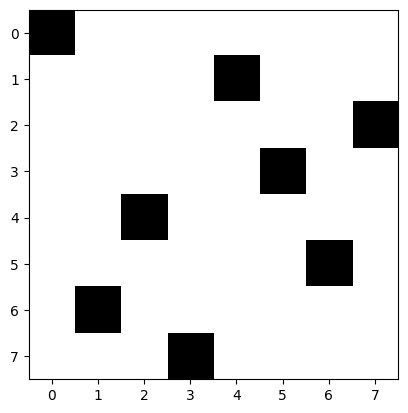

Solution: [0, 4, 7, 5, 2, 6, 1, 3]


In [12]:
import networkx as nx
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

# Function to check if the position is safe for the queen
def is_safe(state, row, col):
    for i in range(row):
        if state[i] == col or \
           state[i] - i == col - row or \
           state[i] + i == col + row:
            return False
    return True

# Function to generate new states
def generate_new_states(state, n):
    new_states = []
    row = len(state)
    if row < n:
        for col in range(n):
            if is_safe(state, row, col):
                new_states.append(state + [col])
    return new_states

# Function to visualize the board
def visualize_board(state, n):
    board = np.zeros((n, n), dtype=int)
    for row, col in enumerate(state):
        board[row, col] = 1
    plt.imshow(board, cmap='binary')
    plt.show()

# BFS implementation for 8-queens
def bfs_8_queens(n):
    initial_state = []
    queue = deque([initial_state])
    
    while queue:
        current_state = queue.popleft()
        
        if len(current_state) == n:
            visualize_board(current_state, n)
            print("Solution:", current_state)
            return current_state
        
        for new_state in generate_new_states(current_state, n):
            queue.append(new_state)

    return None

# Driver Code
n = 8  # For 8-queens problem
print("Solving the 8-Queens Problem using BFS")
solution = bfs_8_queens(n)


Following is the Breadth-First Search


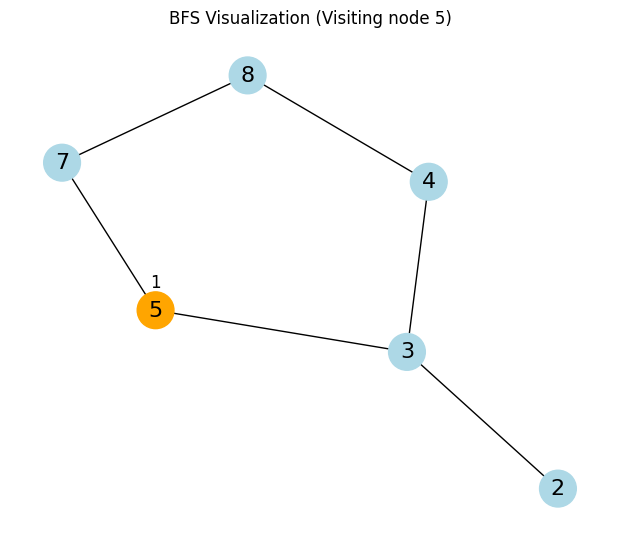

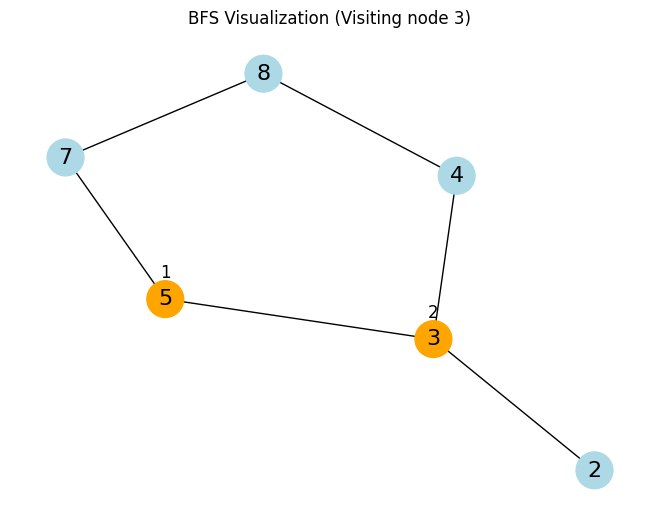

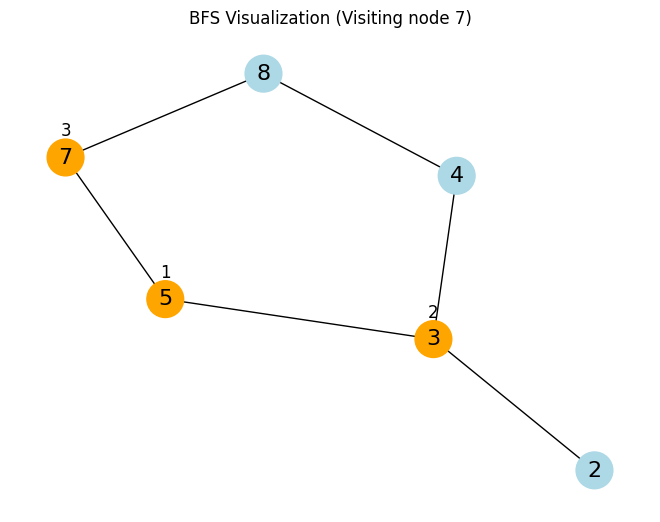

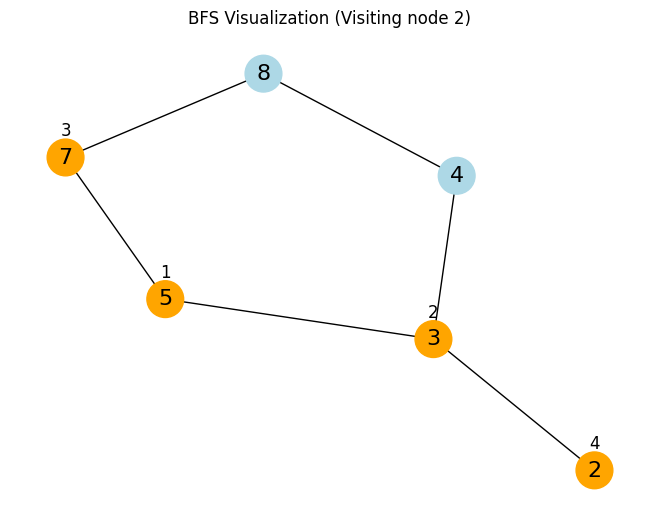

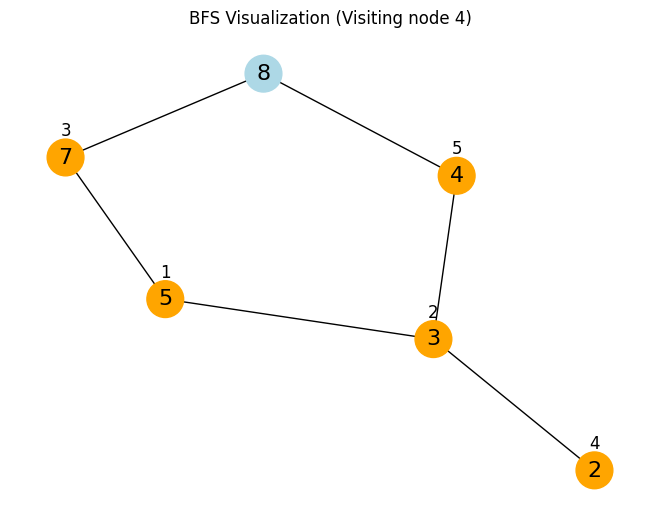

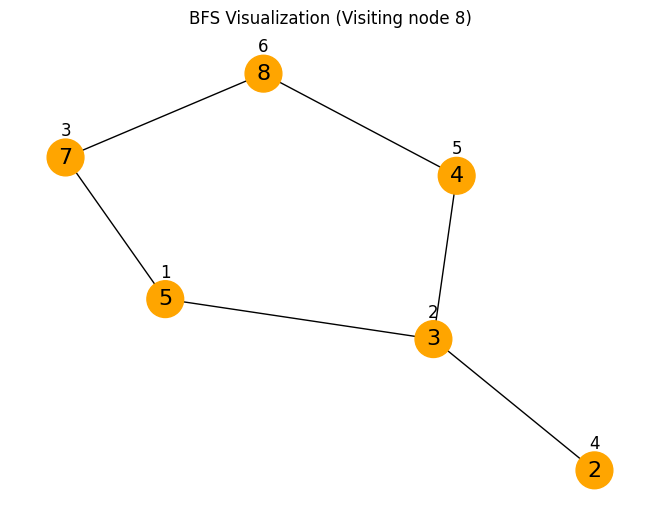


Path: 5 -> 3 -> 7 -> 2 -> 4 -> 8

BFS Traversal Steps:
|   Current Node | Parent Node   | QUEUE   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---------------:|:--------------|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|              5 | -             |         | 5                 |   1 | -   | -   | -   | -   | -   |
|              3 | 5             | 7       | 5 3               |   2 | 2   | -   | -   | -   | -   |
|              7 | 5             | 2 4     | 5 3 7             |   3 | 3   | 3   | -   | -   | -   |
|              2 | 3             | 4 8     | 5 3 7 2           |   4 | 4   | 4   | 4   | -   | -   |
|              4 | 3             | 8       | 5 3 7 2 4         |   5 | 5   | 5   | 5   | 5   | -   |
|              8 | 7             |         | 5 3 7 2 4 8       |   6 | 6   | 6   | 6   | 6   | 6   |


In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque([(start, None)])  # Initialize a queue with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while queue:  # Loop to visit each node
        current_node, parent_node = queue.popleft()
        if current_node not in visited:
            visited.append(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(visited.index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"BFS Visualization (Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node if parent_node else '-',
                'QUEUE': ' '.join([node for node, _ in queue]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            for neighbour in graph[current_node]:
                if neighbour not in visited and all(neighbour != n for n, _ in queue):  # Ensure not revisiting
                    queue.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nBFS Traversal Steps:")
    print(df.to_markdown(index=False))


    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling


Following is the Breadth-First Search


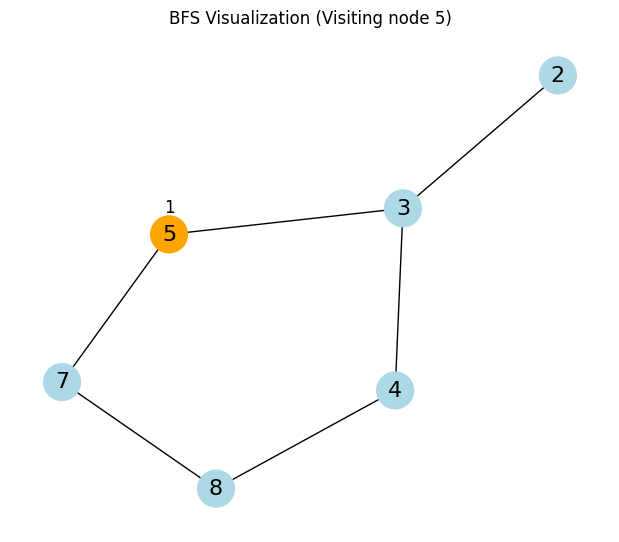

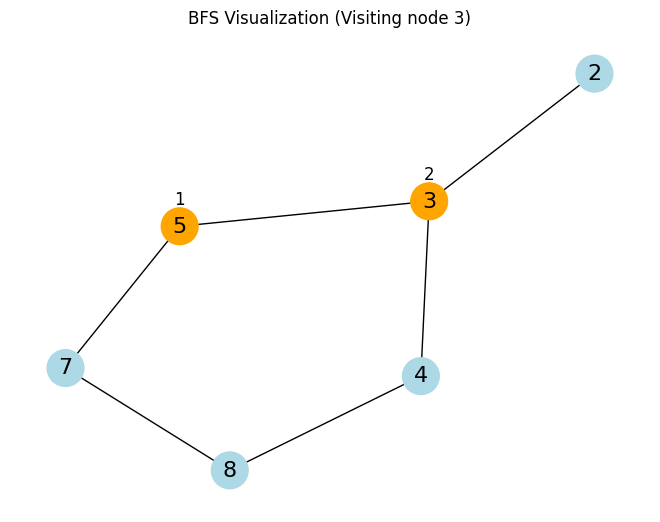

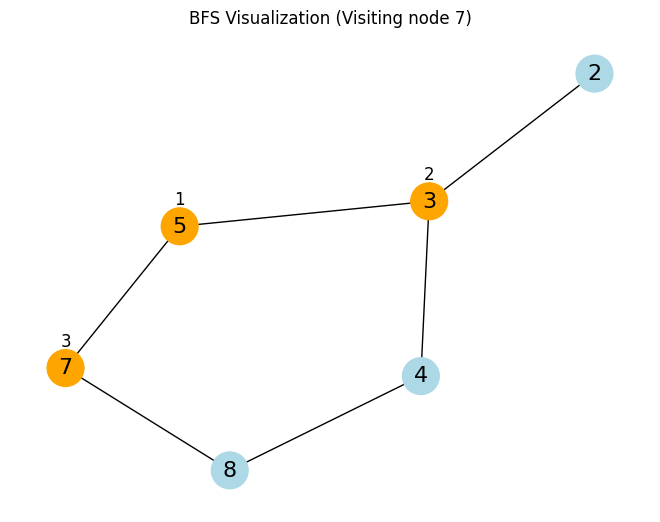

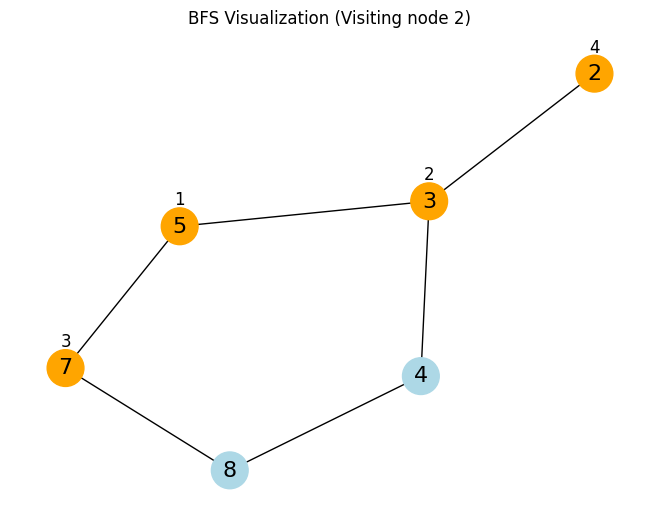

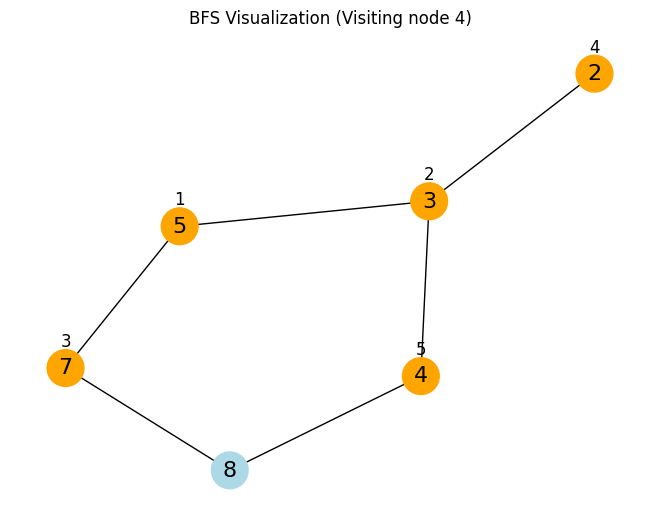

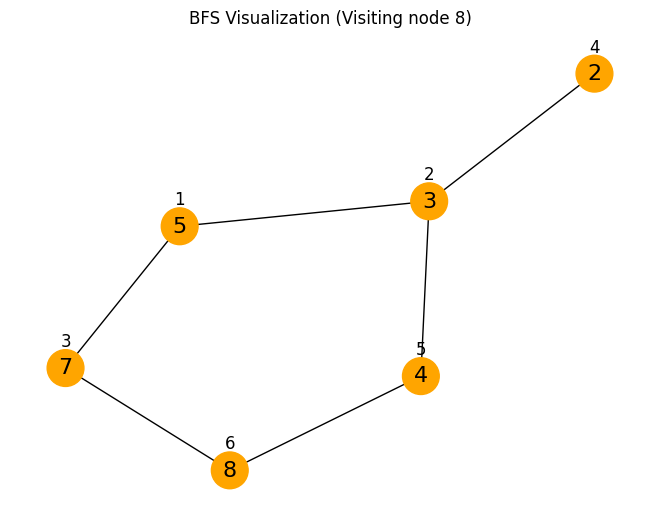


Path: 5 -> 3 -> 7 -> 2 -> 4 -> 8

BFS Traversal Steps:
  Current Node Parent Node QUEUE Processed Nodes  5  3  7  2  4  8
0            5        None                     5  1  -  -  -  -  -
1            3           5     7             5 3  2  2  -  -  -  -
2            7           5   2 4           5 3 7  3  3  3  -  -  -
3            2           3   4 8         5 3 7 2  4  4  4  4  -  -
4            4           3     8       5 3 7 2 4  5  5  5  5  5  -
5            8           7           5 3 7 2 4 8  6  6  6  6  6  6


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque([(start, None)])  # Initialize a queue with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while queue:  # Loop to visit each node
        current_node, parent_node = queue.popleft()
        if current_node not in visited:
            visited.append(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(visited.index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"BFS Visualization (Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node,
                'QUEUE': ' '.join([node for node, _ in queue]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            for neighbour in graph[current_node]:
                if neighbour not in visited and all(neighbour != n for n, _ in queue):  # Ensure not revisiting
                    queue.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nBFS Traversal Steps:")
    print(df)

    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling
